In [1]:
from simba import *
from sympy import symbols, simplify, init_printing
init_printing()

The unstable filter transfer function is given by,

$$
G(s) = \frac{s - 2}{s + 2}
$$

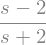

In [2]:
s = symbols('s')
tf = (s - 2) / (s + 2)
tf

In [3]:
transfer_function_to_state_space(tf).extended_to_quantum()

Matrix([
[2, 0],
[0, 2]])
Matrix([
[1, 0],
[0, 1]])
Matrix([
[4, 0],
[0, 4]])
Matrix([
[1, 0],
[0, 1]])